In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf

# New Section

In [192]:
# Scrap the data from Yahoo..! with specific stock_symbol

# Ticker symbol representing EUR/INR exchange rate
stock_symbol = 'EURINR=X'

# Fetch EUR/INR exchange rate data from Yahoo Finance
df = yf.download(stock_symbol, start='2023-01-01', end='2023-12-08')

df = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
# Display the fetched data
df.head(244)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0
2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0
2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0
2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0
2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0
...,...,...,...,...,...,...
2023-12-01,90.682999,90.879997,90.167999,90.651001,90.651001,0
2023-12-04,89.747002,90.788002,89.747002,89.747002,89.747002,0
2023-12-05,90.321999,90.364998,89.807999,90.302002,90.302002,0


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2023-01-02 to 2023-12-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       244 non-null    float64
 1   High       244 non-null    float64
 2   Low        244 non-null    float64
 3   Close      244 non-null    float64
 4   Adj Close  244 non-null    float64
 5   Volume     244 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.3 KB


In [194]:
df.copy()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0
2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0
2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0
2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0
2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0
...,...,...,...,...,...,...
2023-12-01,90.682999,90.879997,90.167999,90.651001,90.651001,0
2023-12-04,89.747002,90.788002,89.747002,89.747002,89.747002,0
2023-12-05,90.321999,90.364998,89.807999,90.302002,90.302002,0


In [195]:
#set index date column
df.reset_index(inplace = True)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       244 non-null    datetime64[ns]
 1   Open       244 non-null    float64       
 2   High       244 non-null    float64       
 3   Low        244 non-null    float64       
 4   Close      244 non-null    float64       
 5   Adj Close  244 non-null    float64       
 6   Volume     244 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.5 KB


In [197]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.0
mean,88.928086,89.391984,88.673933,89.046991,89.046991,0.0
std,1.282807,1.173609,1.255919,1.172830,1.172830,0.0
min,85.691902,86.615997,85.691902,86.383003,86.383003,0.0
25%,87.998249,88.485750,87.754751,88.161249,88.161249,0.0
50%,88.908501,89.264500,88.689503,89.001503,89.001503,0.0
75%,89.891251,90.203253,89.553247,89.941751,89.941751,0.0
max,92.124001,92.514000,91.982002,92.133003,92.133003,0.0


In [199]:
# df['1_MA'] = df['Close'].rolling(window=1).mean()

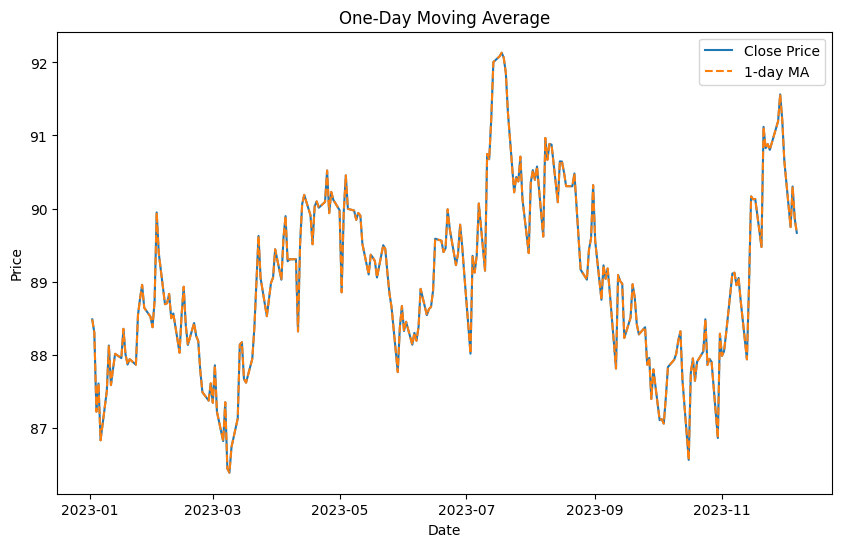

In [186]:
# One Day moving Average
df['1_MA'] = df['Close'].rolling(window=1).mean()

# calculate std_deviation
std_dev = df['Close'].std()

# Calculate upper and lower bolinger band for the day
df['upper_band'] = df['1_MA'] + 2 * std_dev
df['lower_band'] = df['1_MA'] - 2 * std_dev

# Plotting Bollinger Bands
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['1_MA'], label='1-day MA', linestyle='--')
plt.title('One-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [187]:
# Calculate Commodity Channel Index
df['TP']= (df['High'] + df['Low'] + df['Close'])/3

# Define the period for CCI Calculate Simple Moving Average of Typical Price (you can adjust the window size)
period = 14
# period = 1
# calcluate simple moving average of TP for the period1
df['SMA'] = df['TP'].rolling(window=period).mean()

In [170]:
#calculate mean deviatation
# df['MD'] = df['TP'].rolling(window=period).apply(lambda x: np.mean(np.abs(x - x.mean())))
df['MD'] = df['TP'].mad()

<ipython-input-170-881ca724d05a>:3: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  df['MD'] = df['TP'].mad()


In [171]:
# One Day CCI
# Calculate Commodity Channel Index (CCI)
df['CCI_1'] = (df['TP'] - df['SMA']) / (0.015 * df['MD'])

In [200]:
# df

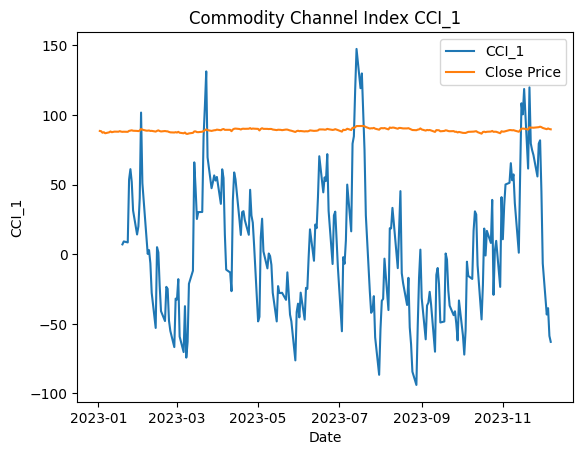

In [173]:
# Plot the CCI
plt.plot(df['Date'], df['CCI_1'], label='CCI_1')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Commodity Channel Index CCI_1')
plt.xlabel('Date')
plt.ylabel('CCI_1')
plt.legend()
plt.show()

In [183]:
# Tempary Decision Column add by compairing between close and 1_MA and upper band column

df['Decision'] = np.where((df['Close'] > df['1_MA']) & (df['Close'] > df['upper_band']), 'BUY', 'SELL')

In [184]:
df['Decision'].value_counts()

SELL    244
Name: Decision, dtype: int64

In [175]:
# Check the prize of commodity Channel Index making function

def check_CCI(x):
  if x['CCI_1'] >+ 100:
    return 'BUY'
  else:
    return 'SELL'

In [176]:
# Apply function on Whole datframe add column CC_Desc commodity temprary decision

df['CC_Desc'] = df.apply(check_CCI,axis=1)

In [177]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,1_MA,upper_band,lower_band,TP,SMA,MD,CCI_1,Decision,CC_Desc
0,2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0,88.482002,90.827662,86.136342,88.013234,NaN,0.966197,NaN,SELL,SELL
1,2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0,88.300003,90.645663,85.954343,87.946335,NaN,0.966197,NaN,SELL,SELL
2,2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0,87.219002,89.564662,84.873342,87.453667,NaN,0.966197,NaN,SELL,SELL
3,2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0,87.605003,89.950663,85.259343,87.390002,NaN,0.966197,NaN,SELL,SELL
4,2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0,86.827003,89.172663,84.481343,87.029668,NaN,0.966197,NaN,SELL,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023-12-01,90.682999,90.879997,90.167999,90.651001,90.651001,0,90.651001,92.996661,88.305341,90.566332,90.662397,0.966197,-6.628389,SELL,SELL
240,2023-12-04,89.747002,90.788002,89.747002,89.747002,89.747002,0,89.747002,92.092662,87.401342,90.094002,90.721564,0.966197,-43.301185,SELL,SELL
241,2023-12-05,90.321999,90.364998,89.807999,90.302002,90.302002,0,90.302002,92.647662,87.956342,90.158333,90.720040,0.966197,-38.757260,SELL,SELL
242,2023-12-06,89.860001,89.947998,89.716003,89.862000,89.862000,0,89.862000,92.207660,87.516340,89.842000,90.692231,0.966197,-58.665061,SELL,SELL


In [178]:
df['CC_Desc'].value_counts()

SELL    232
BUY      12
Name: CC_Desc, dtype: int64

In [179]:
# Function to create 'Final_Decision' based on conditions
def final_decision(row):
    if row['Decision'] == 'BUY' and row['CC_Desc'] == 'BUY':
        return 'BUY'
    elif row['Decision'] == 'SELL' and row['CC_Desc'] == 'BUY':
        return 'NEUTRAL'
    else:
      return 'SELL'

# Apply function to create 'Final_Decision' column
df['Final_Decision'] = df.apply(final_decision, axis=1)

In [215]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,1_MA,7_MA,upper_band_7,lower_band_7,TP,TP_mean,TP_mean_dev,CCI_7,Decision_7,CC_Des_7,Final_Decision_7
0,2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0,88.482002,NaN,NaN,NaN,88.013234,NaN,NaN,NaN,SELL,SELL,SELL
1,2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0,88.300003,NaN,NaN,NaN,87.946335,NaN,NaN,NaN,SELL,SELL,SELL
2,2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0,87.219002,NaN,NaN,NaN,87.453667,NaN,NaN,NaN,SELL,SELL,SELL
3,2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0,87.605003,NaN,NaN,NaN,87.390002,NaN,NaN,NaN,SELL,SELL,SELL
4,2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0,86.827003,NaN,NaN,NaN,87.029668,NaN,NaN,NaN,SELL,SELL,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023-12-01,90.682999,90.879997,90.167999,90.651001,90.651001,0,90.651001,91.058286,91.670007,90.446566,90.566332,91.003586,0.278165,-104.794781,SELL,SELL,SELL
240,2023-12-04,89.747002,90.788002,89.747002,89.747002,89.747002,0,89.747002,90.896000,92.069511,89.722490,90.094002,90.904681,0.362940,-148.909668,SELL,SELL,SELL
241,2023-12-05,90.321999,90.364998,89.807999,90.302002,90.302002,0,90.302002,90.824429,92.082475,89.566384,90.158333,90.799967,0.452695,-94.490879,SELL,SELL,SELL
242,2023-12-06,89.860001,89.947998,89.716003,89.862000,89.862000,0,89.862000,90.647858,92.063769,89.231947,89.842000,90.663572,0.569606,-96.156765,SELL,SELL,SELL


In [30]:
df.iloc[-1]

Date              2023-12-07 00:00:00
Open                           89.555
High                        89.906998
Low                         89.545998
Close                          89.667
Adj Close                      89.667
Volume                              0
1_MA                           89.667
upper_band                   92.01266
lower_band                   87.32134
TP                          89.706665
SMA                         90.618731
MD                           0.966197
CCI_1                      -62.931626
Decision                         SELL
CC_Desc                          SELL
Final_Decision                   SELL
Name: 243, dtype: object

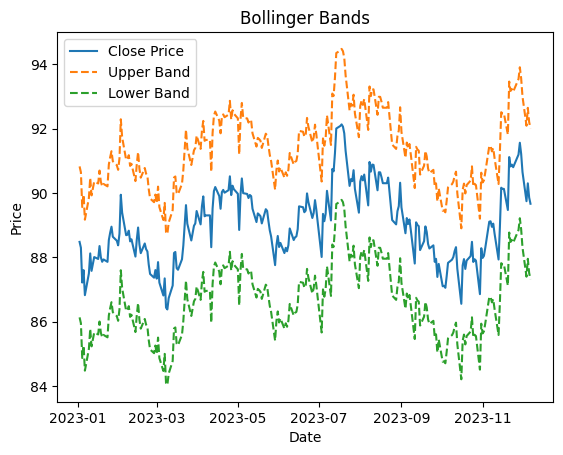

In [141]:
# Plot the data and Bolinger Bands
plt.plot(df['Date'], df['Close'], label='Close Price')
# plt.plot(df['Date'], df['MD'], label='Middle Bande', linestyle='--')
plt.plot(df['Date'], df['upper_band'], label='Upper Band', linestyle='--')
plt.plot(df['Date'], df['lower_band'], label='Lower Band', linestyle='--')

plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [202]:
# 7 Days Moving Average

df['7_MA'] = df['Close'].rolling(window=7).mean()

# calculate std_deviation
std_dev = df['Close'].rolling(window=7).std()

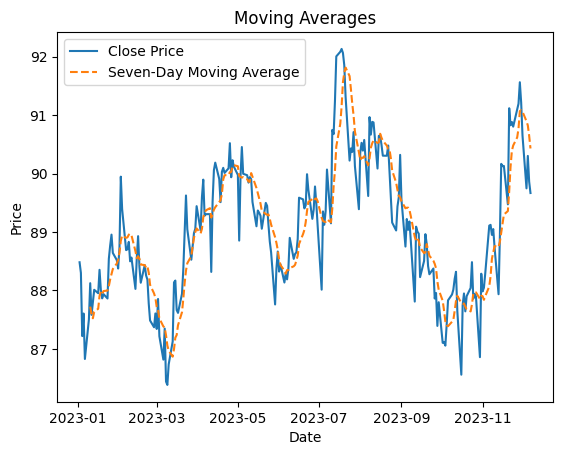

In [203]:
# Plot the data and moving averages of 7 day

plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['7_MA'], label='Seven-Day Moving Average', linestyle='--')

plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

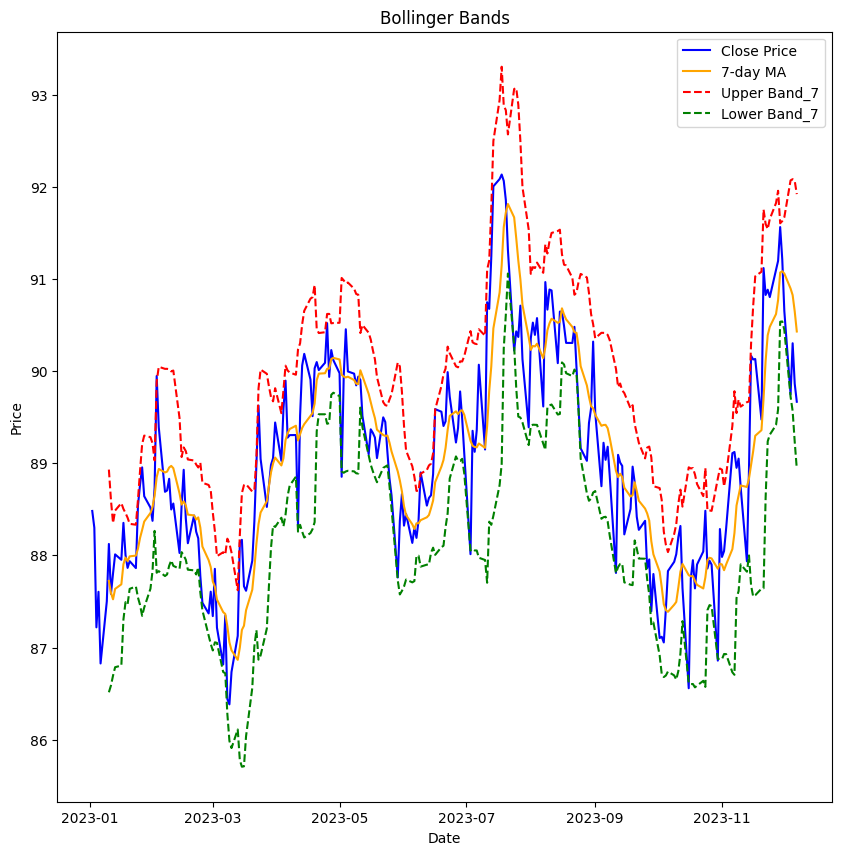

In [204]:
# Calculate upper and lower bolinger band for the day

df['upper_band_7'] = df['7_MA'] + 2 * std_dev
df['lower_band_7'] = df['7_MA'] - 2 * std_dev

# Plotting Bollinger Bands
plt.figure(figsize=(10,10))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.plot(df['Date'], df['7_MA'], label='7-day MA', color='orange')
plt.plot(df['Date'], df['upper_band_7'], label='Upper Band_7', color='red', linestyle='dashed')
plt.plot(df['Date'], df['lower_band_7'], label='Lower Band_7', color='green', linestyle='dashed')
plt.title('Bollinger Bands')
plt.xlabel('Date')
# plt.xticks(fontsize)
plt.ylabel('Price')
plt.legend()
plt.show()

In [205]:
#Calculate Commodity Channel Index

In [206]:
#calculate Typical prize
df['TP']= (df['High'] + df['Low'] + df['Close'])/3

# Define the period for CCI calculation
period = 7
# calcluate simple moving average of TP for the period1
df['TP_mean'] = df['TP'].rolling(window=period).mean()


# calculate mean deviatation
df['TP_mean_dev'] = df['TP'].rolling(window=period).apply(lambda x: np.mean(np.abs(x - x.mean())))

# Calculate Commodity Channel Index (CCI)
df['CCI_7'] = (df['TP'] - df['TP_mean']) / (0.015 * df['TP_mean_dev'])

In [218]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,7_MA,upper_band_7,lower_band_7,TP,TP_mean,TP_mean_dev,CCI_7,Decision_7,CC_Des_7,Final_Decision_7
0,2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0,NaN,NaN,NaN,88.013234,NaN,NaN,NaN,SELL,SELL,SELL
1,2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0,NaN,NaN,NaN,87.946335,NaN,NaN,NaN,SELL,SELL,SELL
2,2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0,NaN,NaN,NaN,87.453667,NaN,NaN,NaN,SELL,SELL,SELL
3,2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0,NaN,NaN,NaN,87.390002,NaN,NaN,NaN,SELL,SELL,SELL
4,2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0,NaN,NaN,NaN,87.029668,NaN,NaN,NaN,SELL,SELL,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023-12-01,90.682999,90.879997,90.167999,90.651001,90.651001,0,91.058286,91.670007,90.446566,90.566332,91.003586,0.278165,-104.794781,SELL,SELL,SELL
240,2023-12-04,89.747002,90.788002,89.747002,89.747002,89.747002,0,90.896000,92.069511,89.722490,90.094002,90.904681,0.362940,-148.909668,SELL,SELL,SELL
241,2023-12-05,90.321999,90.364998,89.807999,90.302002,90.302002,0,90.824429,92.082475,89.566384,90.158333,90.799967,0.452695,-94.490879,SELL,SELL,SELL
242,2023-12-06,89.860001,89.947998,89.716003,89.862000,89.862000,0,90.647858,92.063769,89.231947,89.842000,90.663572,0.569606,-96.156765,SELL,SELL,SELL


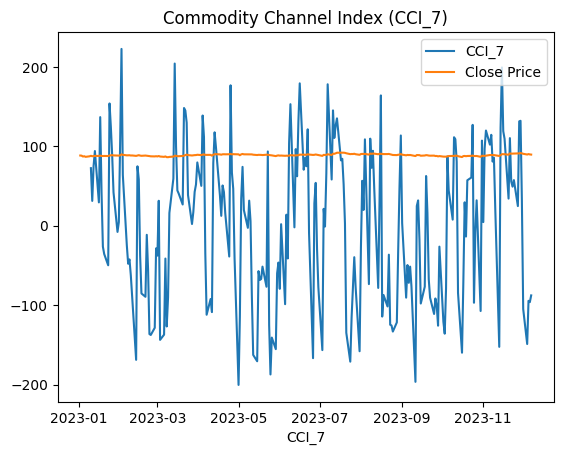

In [208]:

# plot the CCI for 7 days
plt.plot(df['Date'], df['CCI_7'], label='CCI_7')
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title('Commodity Channel Index (CCI_7)')
plt.xlabel('Date')
plt.xlabel('CCI_7')
plt.legend()
plt.show()

In [209]:
df['Decision_7'] = np.where((df['Close'] > df['7_MA']) & (df['Close'] > df['upper_band_7']), 'BUY', 'SELL')

In [210]:
def check_CI_7(x):
  if x['CCI_7'] >+ 100:
    return 'BUY'
  else:
    return 'SELL'

In [211]:
df['CC_Des_7'] = df.apply(check_CI_7,axis=1)

In [212]:
# Function to create 'Final_Decision' based on conditions
def final_decision(row):
    if row['Decision_7'] == 'BUY' and row['CC_Des_7'] == 'BUY':
        return 'BUY'
    elif row['Decision_7'] == 'SELL' and row['CC_Des_7'] == 'BUY':
        return 'NEUTRAL'
    else:
      return 'SELL'

# Apply function to create 'Final_Decision' column
df['Final_Decision_7'] = df.apply(final_decision, axis=1)

In [213]:
df['Final_Decision_7'].value_counts()

SELL       202
NEUTRAL     39
BUY          3
Name: Final_Decision_7, dtype: int64

In [216]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,7_MA,upper_band_7,lower_band_7,TP,TP_mean,TP_mean_dev,CCI_7,Decision_7,CC_Des_7,Final_Decision_7
0,2023-01-02,87.157700,88.400002,87.157700,88.482002,88.482002,0,NaN,NaN,NaN,88.013234,NaN,NaN,NaN,SELL,SELL,SELL
1,2023-01-03,88.292000,88.313004,87.225998,88.300003,88.300003,0,NaN,NaN,NaN,87.946335,NaN,NaN,NaN,SELL,SELL,SELL
2,2023-01-04,87.219002,87.922997,87.219002,87.219002,87.219002,0,NaN,NaN,NaN,87.453667,NaN,NaN,NaN,SELL,SELL,SELL
3,2023-01-05,87.580002,87.807999,86.757004,87.605003,87.605003,0,NaN,NaN,NaN,87.390002,NaN,NaN,NaN,SELL,SELL,SELL
4,2023-01-06,86.819000,87.614998,86.647003,86.827003,86.827003,0,NaN,NaN,NaN,87.029668,NaN,NaN,NaN,SELL,SELL,SELL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023-12-01,90.682999,90.879997,90.167999,90.651001,90.651001,0,91.058286,91.670007,90.446566,90.566332,91.003586,0.278165,-104.794781,SELL,SELL,SELL
240,2023-12-04,89.747002,90.788002,89.747002,89.747002,89.747002,0,90.896000,92.069511,89.722490,90.094002,90.904681,0.362940,-148.909668,SELL,SELL,SELL
241,2023-12-05,90.321999,90.364998,89.807999,90.302002,90.302002,0,90.824429,92.082475,89.566384,90.158333,90.799967,0.452695,-94.490879,SELL,SELL,SELL
242,2023-12-06,89.860001,89.947998,89.716003,89.862000,89.862000,0,90.647858,92.063769,89.231947,89.842000,90.663572,0.569606,-96.156765,SELL,SELL,SELL


In [159]:
df.iloc[-1]

Date                2023-12-07 00:00:00
Open                             89.555
High                          89.906998
Low                           89.545998
Close                            89.667
Adj Close                        89.667
Volume                                0
7_MA                          90.429429
upper_band_7                  91.920481
lower_band_7                  88.938378
TP                            89.706665
TP_mean                       90.434476
TP_mean_dev                    0.553401
CCI_7                        -87.677308
Decision_7                         SELL
CC_Des_7                           SELL
Final_Decision_7                   SELL
Name: 243, dtype: object

In [86]:
# by using LSTM we can predict the values

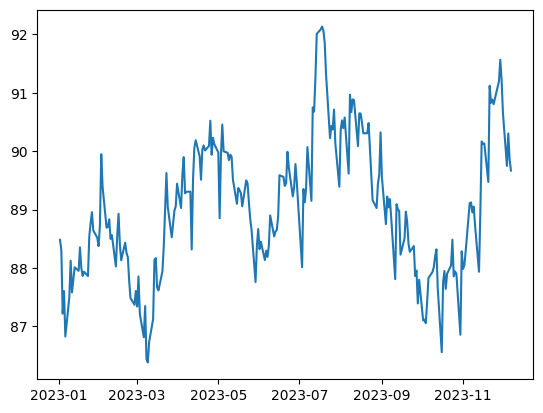

In [46]:
plt.plot(df['Date'],df['Close'])

In [47]:
#consider Only two columns dataframe

price = df[['Close','Date']]

In [48]:
# Date column convert into integer type

price['Date'] = price['Date'].astype(int)

<ipython-input-48-7f2c9185c5c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Date'] = price['Date'].astype(int)


In [49]:
# Doing normalization on dataframe by using MinMaxScaler

scaler = MinMaxScaler()
price_scaled = scaler.fit_transform(price)

In [50]:
# Now check the shape of scaled data

price_scaled.shape

(244, 2)

In [51]:
# get specific data from scaled data by using for loop and converted into array

X = []
for i in range(204):
  row = price_scaled[i:i+41:,0]
  X.append(row)
X = np.array(X)
X.shape

(204, 41)

In [52]:
# consider only last column and consider all rows

X_train, y_train = X[:,:-1],X[:,-1]

In [53]:
# print the value of X_Train in array form

X_train

array([[0.36504331, 0.33339127, 0.14539105, ..., 0.31339032, 0.24208666,
        0.19182553],
       [0.33339127, 0.14539105, 0.21252176, ..., 0.24208666, 0.19182553,
        0.17165209],
       [0.14539105, 0.21252176, 0.07721743, ..., 0.19182553, 0.17165209,
        0.21269558],
       ...,
       [0.28347778, 0.31565127, 0.33669513, ..., 0.84017281, 0.74226048,
        0.5850432 ],
       [0.31565127, 0.33669513, 0.21965226, ..., 0.74226048, 0.5850432 ,
        0.68156499],
       [0.33669513, 0.21965226, 0.03046848, ..., 0.5850432 , 0.68156499,
        0.60504283]])

In [54]:
# print the value of y_Train in array form

y_train

array([0.17165209, 0.21269558, 0.16660873, 0.25582488, 0.1448696 ,
       0.07530411, 0.16782545, 0.00991291, 0.        , 0.06121693,
       0.12921673, 0.30521691, 0.31060791, 0.22295612, 0.21443375,
       0.27113011, 0.34521617, 0.4544346 , 0.56382552, 0.46312946,
       0.37269526, 0.41234688, 0.45199983, 0.46469514, 0.53199967,
       0.45965178, 0.55895598, 0.61095661, 0.50347768, 0.5081734 ,
       0.50834722, 0.3363475 , 0.5448688 , 0.63947727, 0.66156404,
       0.61304242, 0.54399971, 0.63426009, 0.64608632, 0.63095624,
       0.64469445, 0.71947711, 0.61808578, 0.66869454, 0.64973914,
       0.62504246, 0.4295641 , 0.62017292, 0.70799985, 0.62834765,
       0.62417337, 0.60208661, 0.61860856, 0.61234715, 0.54434735,
       0.47217328, 0.51912921, 0.51252149, 0.50365149, 0.46486896,
       0.54173876, 0.53286876, 0.476869  , 0.42695551, 0.39443439,
       0.23949532, 0.3462604 , 0.39704298, 0.3373904 , 0.35947717,
       0.30469546, 0.33304231, 0.31426073, 0.34712949, 0.43773

In [55]:

# again check the shape

X_train.shape,y_train.shape

((204, 40), (204,))

In [56]:
# then reshape the X_train

X_train = X_train.reshape(204,40,1)

In [57]:
X_train.shape

(204, 40, 1)

In [58]:
# Model Building by using Sequential and LSTm and Dense layer for future prize prediction
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [59]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (40,1)))
model.add(LSTM(100, return_sequences = True, dropout=0.2))
model.add(LSTM(100, return_sequences = True, dropout=0.2))
model.add(LSTM(100, return_sequences = False, dropout=0.2))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 40, 100)           80400     
                                                                 
 lstm_2 (LSTM)               (None, 40, 100)           80400     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 282101 (1.08 MB)
Trainable params: 282101 (1.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
7/7 [==============================] - 11s 127ms/step - loss: 0.1180 - accuracy: 0.0049
Epoch 2/100
7/7 [==============================] - 1s 135ms/step - loss: 0.0411 - accuracy: 0.0049
Epoch 3/100
7/7 [==============================] - 1s 143ms/step - loss: 0.0386 - accuracy: 0.0049
Epoch 4/100
7/7 [==============================] - 1s 138ms/step - loss: 0.0308 - accuracy: 0.0098
Epoch 5/100
7/7 [==============================] - 1s 137ms/step - loss: 0.0285 - accuracy: 0.0098
Epoch 6/100
7/7 [==============================] - 1s 136ms/step - loss: 0.0246 - accuracy: 0.0098
Epoch 7/100
7/7 [==============================] - 1s 217ms/step - loss: 0.0244 - accuracy: 0.0098
Epoch 8/100
7/7 [==============================] - 2s 216ms/step - loss: 0.0251 - accuracy: 0.0098
Epoch 9/100
7/7 [==============================] - 1s 194ms/step - loss: 0.0234 - accuracy: 0.0098
Epoch 10/100
7/7 [==============================] - 1s 126ms/step - loss: 0.0210 - accuracy: 0.0098
Epoch 11